In [ ]:
import os
from glob import glob
import matplotlib.pyplot as plt

import joblib
import torch.nn as nn
import torchvision.models as models

from fogvision import gpuutils
from fogvision import fogimageclass

# FogVision

In [ ]:
# initialize embedder 
basemodel = models.resnet50(pretrained=True)

num_ftrs = basemodel.fc.in_features
basemodel.fc = nn.Identity()  # Set the classification layer to identity to output embeddings

# Put the model in evaluation mode
device = gpuutils.get_gpu_most_memory()
print(device)

model = basemodel.to(device)
model.eval()
print() # so model being set to eval isnt printed out


# initialize classification heads
diurnal_classif_head = joblib.load(os.path.join('models', f'fogvision_inference_head_model_diurnal.pkl'))
nocturnal_classif_head = joblib.load(os.path.join('models', f'fogvision_inference_head_model_nocturnal.pkl'))

cuda:1



tensor([9.9933e-01, 2.3970e-05], device='cuda:1')
0


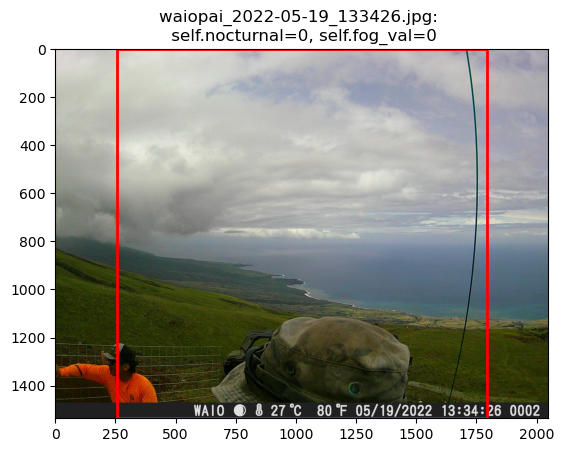

tensor([9.9568e-01, 2.8687e-04], device='cuda:1')
0


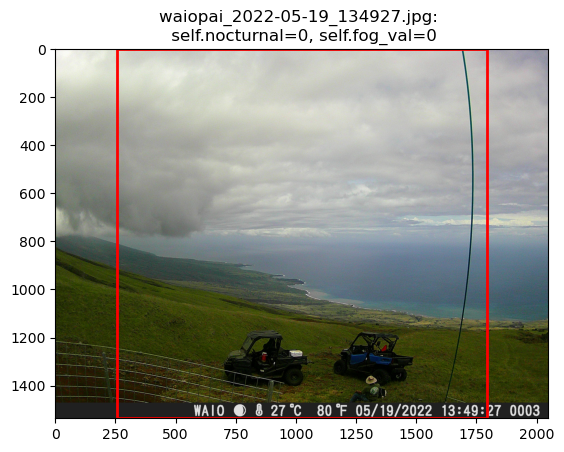

tensor([9.9984e-01, 3.2338e-06], device='cuda:1')
0


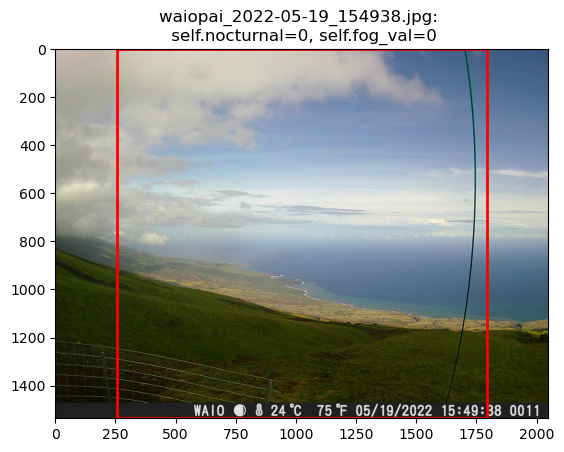

tensor([9.9982e-01, 3.9637e-06], device='cuda:1')
0


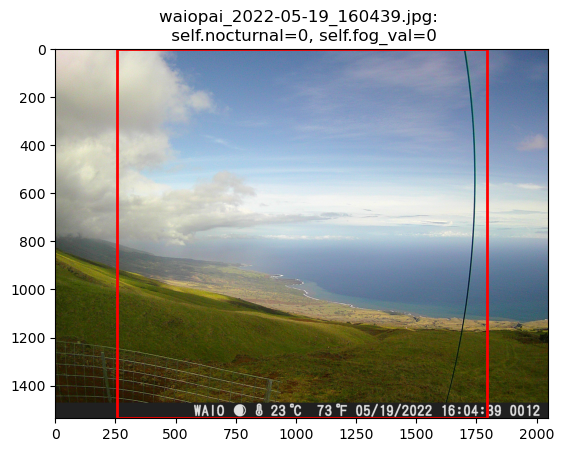

tensor([0.8811, 0.0411], device='cuda:1')
0


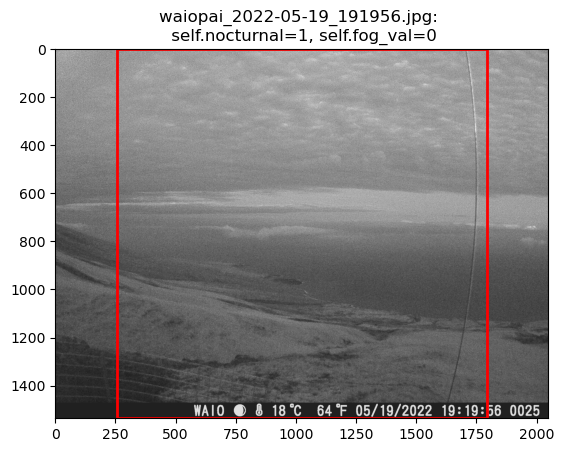

tensor([0.6459, 0.2586], device='cuda:1')
0


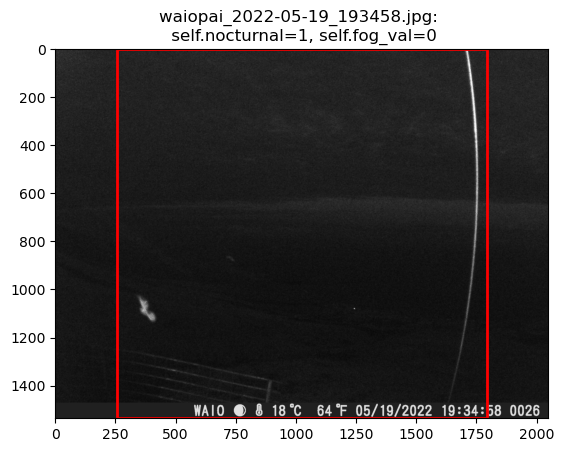

tensor([0.9270, 0.0155], device='cuda:1')
0


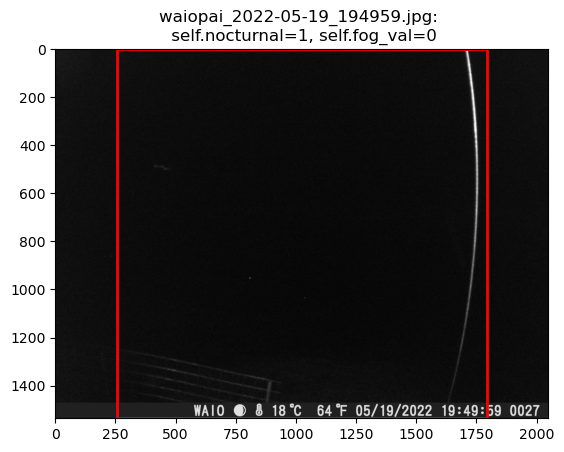

tensor([0.9732, 0.0031], device='cuda:1')
0


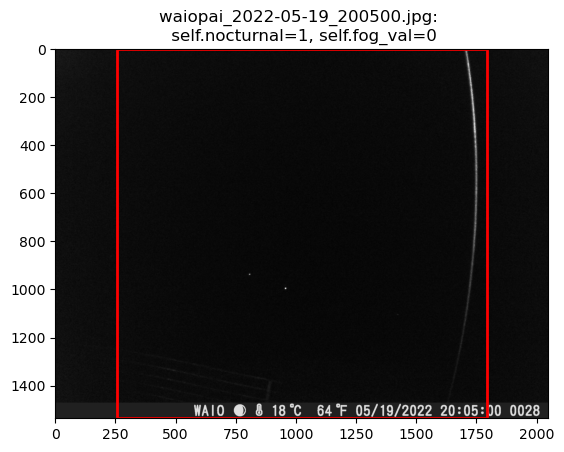

tensor([0.3282, 0.7624], device='cuda:1')
1


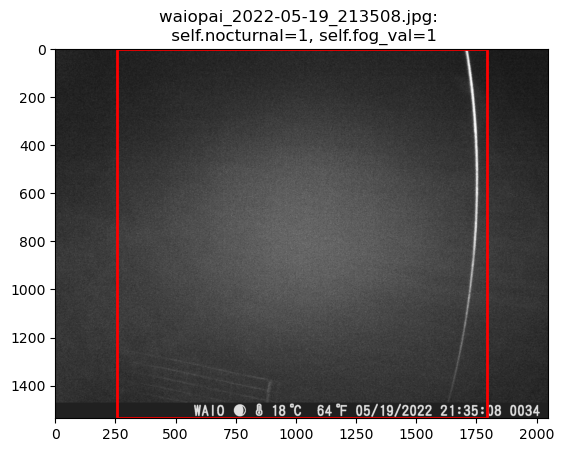

tensor([0.3419, 0.7439], device='cuda:1')
1


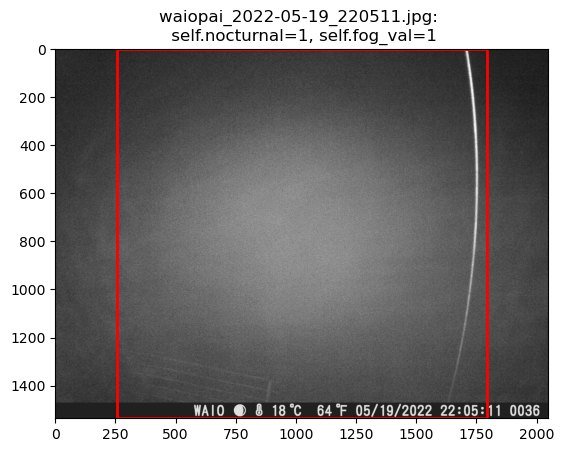

tensor([0.3217, 0.7716], device='cuda:1')
1


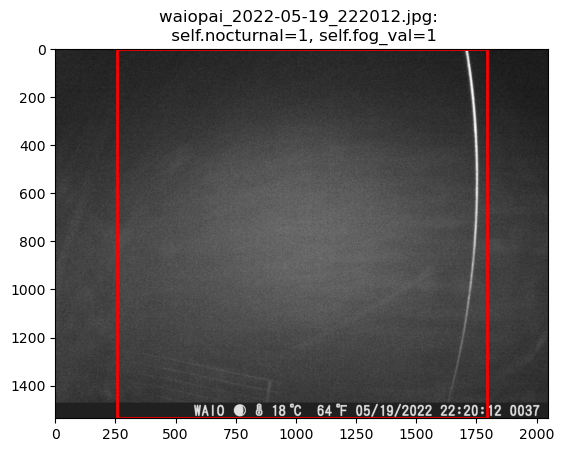

tensor([0.0036, 0.9999], device='cuda:1')
1


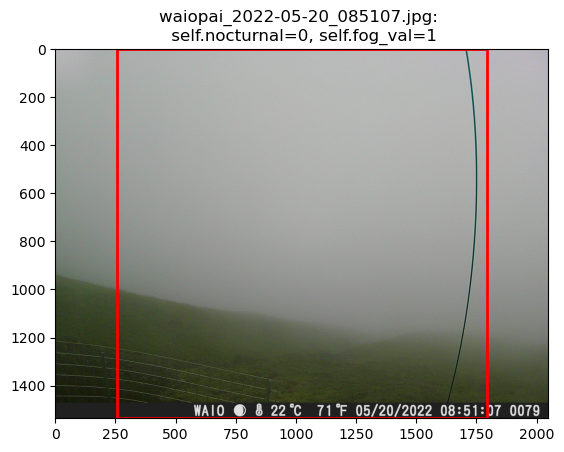

tensor([0.0466, 0.9932], device='cuda:1')
1


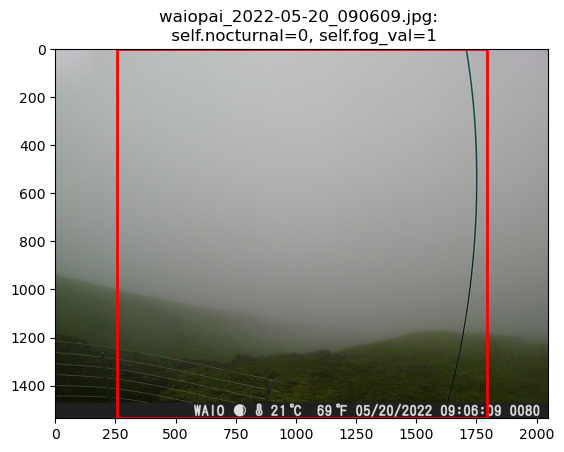

tensor([0.4574, 0.5559], device='cuda:1')
1


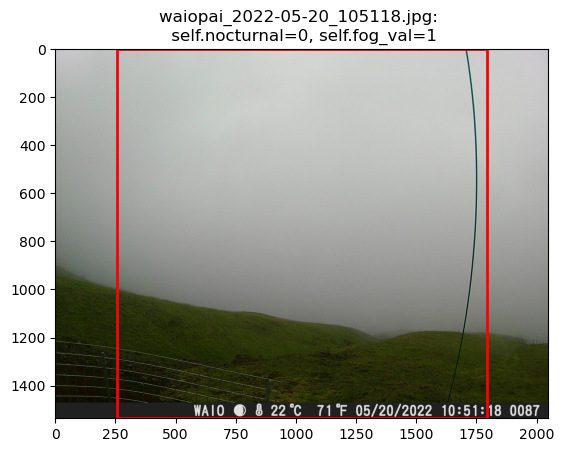

tensor([0.4679, 0.5393], device='cuda:1')
1


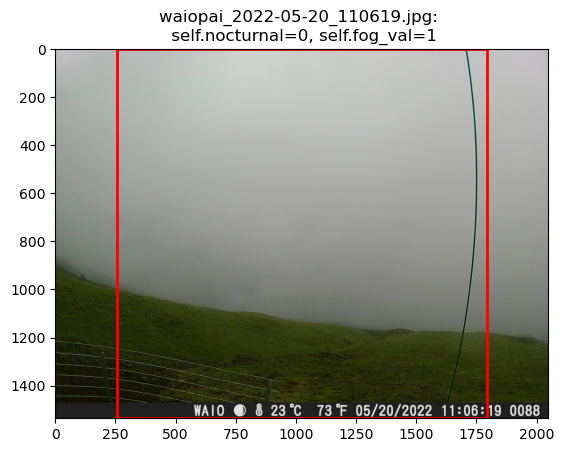

tensor([0.4225, 0.6179], device='cuda:1')
1


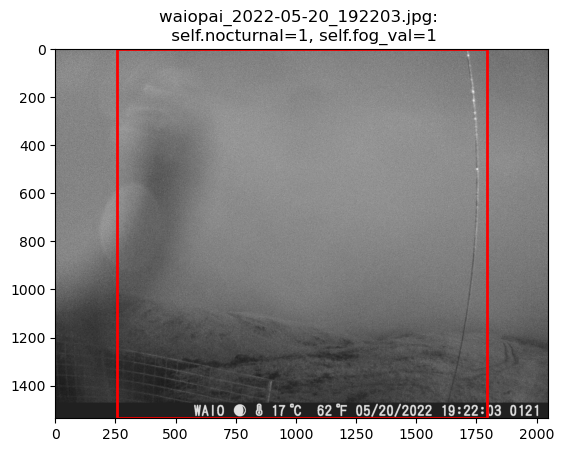

In [16]:
import importlib
importlib.reload(fogimageclass)
image_fns = glob(os.path.join('data', 'images', '*.jpg'))

for fn in image_fns:
    fog_img_class = fogimageclass.FogImage(filepath=fn)
    if fog_img_class.nocturnal:
        fog_img_class.get_fog_val_multiple_regions(model=nocturnal_classif_head, embedding_model=basemodel)
    else:
        fog_img_class.get_fog_val_multiple_regions(model=nocturnal_classif_head, embedding_model=basemodel)

    fog_img_class.plot_image()